In [31]:
import pandas as pd
import numpy as np
import catboost 

## Сначала осмотрим датасет

In [32]:
df = pd.read_csv("train_spam.csv")
df

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


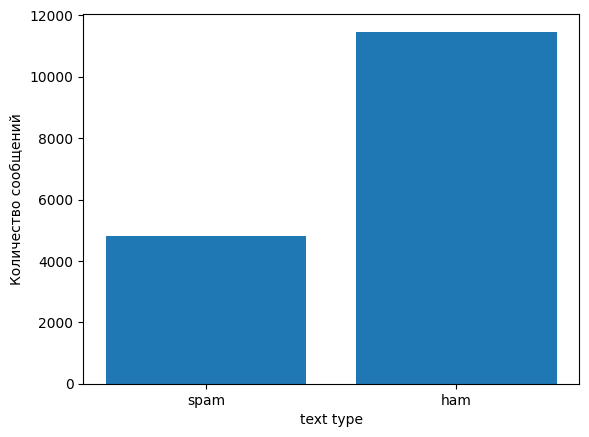

In [33]:
import matplotlib.pyplot as plt
plt.bar(["spam", "ham"], [len(df[df["text_type"] == "spam"]), len(df[df["text_type"] == "ham"])]);
plt.xlabel("text type");
plt.ylabel("Количество сообщений");
plt.show();

### Разобьём предложения на токены

In [34]:
from nltk.tokenize import word_tokenize
texts = []
for i in range(len(df)):
    texts.append([word_tokenize(text.lower()) for text in df.iloc[i]["text"].split()])
print(texts[0])

[['make'], ['sure'], ['alex'], ['knows'], ['his'], ['birthday'], ['is'], ['over'], ['in'], ['fifteen'], ['minutes'], ['as'], ['far'], ['as'], ['youre'], ['concerned']]


### Посчитаем частоту упоминания каждого слова в спам-предложениях и остальных
Если поделим количество упоминаний и поделим на длину всех предложений вместе взятых-получим term frequency
Если найдём количество упоминаний и поделим кол-во предложений на число упоминаний и возьмём логорифм от этого-получим inverse document frequency, необходимую для придачи веса редким словам.

In [47]:
spam_words = {}
len_spam = 0
ham_words = {}
len_ham = 0

train_txt = []
str_to_id = {"ham" : 0,
             "spam" : 1}
tags = []
for i in range(len(df)):
    train_txt.append(df.iloc[i]['text'])
    tags.append(str_to_id[df.iloc[i]['text_type']])


for i in range(len(df)):
    if df.iloc[i]["text_type"] == "spam":
        for word in df.iloc[i]["text"].split():
            spam_words[word] = spam_words.get(word, 0) + 1
            len_spam += 1
    else: 
        for word in df.iloc[i]["text"].split():
            ham_words[word] = ham_words.get(word, 0) + 1
            len_ham += 1

spam_words = dict(sorted(spam_words.items(), key=lambda x: x[1], reverse=True))
ham_words = dict(sorted(ham_words.items(), key=lambda x: x[1], reverse=True))

tf_spam = {}
tf_ham = {}
for key, value in spam_words.items():
    tf_spam[key] = value / len_spam
for key, value in ham_words.items():
    tf_ham[key] = value / len_ham

idf_spam = {}
idf_ham = {}
spam_sentences = len(df[df["text_type"] == "spam"])
ham_sentences = len(df[df["text_type"] == "ham"])
for key, value in spam_words.items():
    idf_spam[key] = np.log(spam_sentences/ value)
for key, value in ham_words.items():
    idf_ham[key] = np.log(ham_sentences / value)

print(ham_words.items())
print(spam_words.items())

dict_items([('the', 22086), ('to', 18507), ('i', 13276), ('1635465', 11000), ('a', 10548), ('and', 10509), ('of', 9006), ('you', 8933), ('in', 7769), ('for', 7125), ('is', 6822), ('on', 6767), ('ect', 5343), ('it', 5256), ('that', 5178), ('enron', 4848), ('vince', 4525), ('this', 4284), ('with', 4061), ('have', 3862), ('be', 3823), ('url', 3617), ('s', 3322), ('we', 3318), ('at', 3273), ('from', 3205), ('your', 3048), ('will', 3037), ('are', 2824), ('me', 2787), ('my', 2756), ('am', 2722), ('if', 2710), ('hou', 2660), ('as', 2628), ('by', 2573), ('not', 2466), ('can', 2391), ('kaminski', 2365), ('2000', 2204), ('subject', 2110), ('or', 2040), ('j', 1928), ('cc', 1909), ('but', 1895), ('please', 1888), ('com', 1852), ('would', 1849), ('pm', 1820), ('an', 1676), ('so', 1652), ('t', 1647), ('was', 1598), ('all', 1528), ('do', 1476), ('u', 1424), ('like', 1423), ('thanks', 1406), ('about', 1372), ('time', 1370), ('has', 1358), ('2001', 1347), ('know', 1340), ('get', 1331), ('he', 1305), ('

In [45]:
print(dict(sorted(idf_spam.items(), key=lambda x: x[1], reverse=True)))
print(dict(sorted(idf_ham.items(), key=lambda x: x[1], reverse=True)))

{'moviesgodml': 8.478244441277663, 'ads😊😊😊😊😁': 8.478244441277663, '09061790121': 8.478244441277663, 'continually': 8.478244441277663, 'comprehe': 8.478244441277663, 'docusign': 8.478244441277663, 'covid19?the': 8.478244441277663, 'fever': 8.478244441277663, 'fatigue': 8.478244441277663, 'diminished': 8.478244441277663, 'accompanied': 8.478244441277663, 'nasal': 8.478244441277663, 'congestion': 8.478244441277663, 'runny': 8.478244441277663, 'sore': 8.478244441277663, 'conjunctivitis': 8.478244441277663, 'myalgia': 8.478244441277663, 'diarrheadefeating': 8.478244441277663, 'navigation': 8.478244441277663, 'phone?': 8.478244441277663, 'mythcoffee': 8.478244441277663, 'drinkers': 8.478244441277663, 'richer': 8.478244441277663, 'below👇👇👇👇👇👇👇👇👇': 8.478244441277663, 'correio': 8.478244441277663, 'carnifornia': 8.478244441277663, 'fosale': 8.478244441277663, 'smartbizz': 8.478244441277663, 'xgab': 8.478244441277663, 'breakthroughrepair': 8.478244441277663, 'uexugthat': 8.478244441277663, 'uexu

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(train_txt, 
                                                    tags, 
                                                    test_size=0.2, 
                                                    random_state=21)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.851965601965602


In [65]:
tfidf_matrix = tfidf_vectorizer.fit_transform(train_txt)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)

for cluster_id in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
    print(f"Кластер {cluster_id + 1}:")
    for idx in cluster_indices:
        print(train_txt[idx])
        break
    print("--------")

tfidf_matrix_test = tfidf_vectorizer.fit_transform(X_test)
pred = kmeans.fit_predict(tfidf_matrix_test)

accuracy = accuracy_score(y_test, pred)
print(f"Точность модели: {accuracy}")

Кластер 1:
make sure alex knows his birthday is over in fifteen minutes as far as youre concerned
--------
Кластер 2:
a resume for john lavorato thanks vince i will get moving on it right away molly vince j kaminski 02 21 2001 05 55 pm to molly magee hou ect ect cc vince j kaminski hou ect ect subject a resume for john lavorato molly please make arrangements for the interview with this candidate for a trading position interviews with john lavorato jeff shankman gary hickerson stinson gibner i talked to him in new york and he is considering other opportunities so we have to act fast i think john will like him more than punit thanks
--------
Точность модели: 0.5368550368550369


## Сначала попробую дообучить BERT на классификацию

In [9]:
from transformers import AutoModel, BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch

C:\Users\fktrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
PRE_TRAINED_MODEL_NAME = 'google-bert/bert-base-uncased'
model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=2)
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
class SpamMessageDataset(Dataset):

  def __init__(self, encodings, targets, test=True):
    self.encodings = encodings
    self.targets = targets
  
  def __len__(self):
    return len(self.targets)
  
  def __getitem__(self, idx):
    item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
    item["labels"] = torch.tensor([self.targets[idx]])
    return item

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Обучение BERT

In [12]:
BATCH_SIZE = 2
MAX_LEN = 512

tokens_train = tokenizer.batch_encode_plus(
    train_txt,
    max_length = MAX_LEN,
    padding = 'max_length',
    truncation = True
)

df["tag"] = tags

train_dataset = SpamMessageDataset(
    encodings=tokens_train,
    targets=df["tag"].to_numpy()
)

print(train_dataset[0:2])

{'input_ids': tensor([[  101,  2191,  2469,  ...,     0,     0,     0],
        [  101,  1037, 13746,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[0, 0]])}


C:\Users\fktrc\AppData\Local\Temp\ipykernel_29080\1885721094.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:278.)
  item["labels"] = torch.tensor([self.targets[idx]])


In [13]:

test_dataset = SpamMessageDataset(
    encodings=tokens_train[0:100],
    targets=df["tag"].to_numpy()[0:100]
)

print(test_dataset[0:2])

{'input_ids': tensor([[  101,  2191,  2469,  ...,     0,     0,     0],
        [  101,  1037, 13746,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[0, 0]])}


In [ ]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=OEP2HU0B2VYWJDF5YL1B
%env CLEARML_API_SECRET_KEY=uaHk2bfb6zdxfDAwin9OfZx1rNRK8aL8xXMqmvbuRlpJbJl6CC

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds)
    return {'F1': f1}

training_args = TrainingArguments(
    output_dir = '/results', #Выходной каталог
    num_train_epochs = 4, #Кол-во эпох для обучения
    per_device_train_batch_size = 4, #Размер пакета для каждого устройства во время обучения
    per_device_eval_batch_size = 4, #Размер пакета для каждого устройства во время валидации
    weight_decay = 0.01, #Понижение весов
    logging_dir = '/logs', #Каталог для хранения журналов
    load_best_model_at_end = True, #Загружать ли лучшую модель после обучения
    learning_rate = 1e-5, #Скорость обучения
    evaluation_strategy ='epoch', #Валидация после каждой эпохи (можно сделать после конкретного кол-ва шагов)
    logging_strategy = 'epoch', #Логирование после каждой эпохи
    save_strategy = 'epoch', #Сохранение после каждой эпохи
    save_total_limit = 1)

trainer = Trainer(model=model,
                  tokenizer = tokenizer,
                  args = training_args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics = compute_metrics)

In [ ]:
trainer.train()

## Работа с обученной моделью
Для удобства создам отдельный класс, которому мы подаём текст и получаем тэги

In [69]:
import os
import torch
import torch.nn as nn
from transformers import BertTokenizerFast as BertTokenizer, BertModel
from transformers import AutoModel, BertTokenizer, BertForSequenceClassification


os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
PRE_TRAINED_MODEL_NAME = 'google-bert/bert-base-uncased'

class SpamPredictor():
   def __init__(self):
      super().__init__()
      self.model = None
      self.tokenizer = None
      self.weights = torch.load("best_model_state.bin")
      self.tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
      self.model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=2).to(device)
      self.model.load_state_dict(self.weights)
      self.model.eval()
      self.tags_id_to_str = {
               0 : "ham" ,
               1 : "spam"
      }

   def predict_text(self, data):

      batch = self.tokenizer(data, max_length=512, padding=True, truncation=True, return_tensors='pt')
      input_ids = batch["input_ids"].to(device)
      token_type_ids = batch["token_type_ids"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      outputs = self.model(
        input_ids = input_ids,
        token_type_ids = token_type_ids,
        attention_mask = attention_mask
      )
      _, preds = torch.max(outputs.logits, dim=1)
      category_name = []
      for i in preds:
         category_name.append(self.tags_id_to_str[i.item()])
      return {'result': category_name, "logits": outputs.logits}

pred = SpamPredictor()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [70]:

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
text = "Hi our company has an offer for you, if you give me your credit card"
txt = "Hello how is your day"
tokens_train = tokenizer.batch_encode_plus(
    text,
    max_length = 512,
    padding = 'max_length',
    truncation = True
)
pred.predict_text(text)

{'result': ['spam'],
 'logits': tensor([[-2.8235,  2.9732]], device='cuda:0', grad_fn=<AddmmBackward0>)}

In [29]:
cool=pred.predict_text(text)
cool["logits"].cpu().detach().numpy().tolist()

[[-2.8235180377960205, 2.973160743713379]]

In [18]:
test_df = pd.read_csv("test_spam.csv")
test_df

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...
...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...
4066,baylor enron case study cindy yes i shall co a...
4067,boring as compared to tp
4068,hellogorgeous hows u my fone was on charge lst...


In [19]:
res = []
log = []
torch.cuda.empty_cache()
for i in range(len(test_df)):
    ans = pred.predict_text(test_df.iloc[i]["text"])
    res.append(ans["result"][0])
    log.append(ans["logits"].cpu().detach().numpy().tolist())
    print(ans["logits"])


tensor([[ 5.4101, -5.1206]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.0125, -4.8102]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.3823, -5.0962]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 4.3897, -4.2075]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[-4.2225,  4.1463]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.2185, -4.9819]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 4.8556, -4.6017]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.3954, -5.1571]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.3360, -5.1334]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.3505, -5.0606]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.2548, -4.9776]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.4229, -5.1089]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[-4.7875,  4.7025]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[ 5.0259, -4.7193]], device='cuda:0', grad_fn=<AddmmBack

In [20]:
spams = 0
print(res[0])
for i in range(len(res)):
    if res[i] == "spam":
        print(test_df.iloc[i]["text"])
        spams += 1
print(spams, len(res) - spams)

ham
underpriced issue with high return on equity the oil and gas advisory now that oil and gas has entered a long term bul market our speciaity in pinpointing the hottest companies of the few remaining undervaiued energy plays has produced soaring returns emerson oi and gas eogi is an energy developer in the us oil belt and in canada s most highiy coveted reservoirs with generating potentia of millions per week breaking news emerson oil and gas inc eogi is pleased to announce that the aiberta energy utiiity board has issued license no o 330206 for the company s we 11 16 24 2 the acadia project the acadia project consists of 15 sections in aiberta in an area that produces natura gas from the viking formation has oi potentia in the bakken zone and g
is your business making money set up to accept credit cards today no obligation consultation no set up fees no application fees all credit types accepted retail rates as low as 1635465 1635465 mail order rates as low as 1635465 1635465 set up

In [72]:
y_pred = []
torch.cuda.empty_cache()
for i in range(len(X_test)):
    ans = pred.predict_text(X_test[i])
    y_pred.append(str_to_id[ans["result"][0]])
    


accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9984643734643734


## Итоги
Хоть BERT и в разы медленнее, в данной задаче мне скорее важна точность. \
Точность BERT-а возможно связанана с переобучением, но я всё же выберу его вместо методов, основанных лишь на TF-IDF, поэтому его выводы я и возьму для ответа на test_spam.csv

In [21]:
test_df["text_type"] = res
test_df["scores"] = log

In [22]:
test_df.to_csv("final.csv")

In [75]:
test_df = test_df.drop('text_type', axis=1)
test_df.to_csv("final_submission.csv")